In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr
import seaborn as sns
import squarify as sq
import zipfile
import json
from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors


In [2]:
with zipfile.ZipFile('archive.zip') as z:
    with z.open('Sales Transaction v.4a.csv') as f:
        df = pd.read_csv(f)

In [3]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


## Variables
#### TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
#### Date (numeric): the date when each transaction was generated.
#### ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
#### Product (categorical): product/item name.
#### Price (numeric): the price of each product per unit in pound sterling (£).
#### Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
#### CustomerNo (categorical): a five-digit unique number that defines each customer.
#### Country (categorical): name of the country where the customer resides.

In [5]:
# Dataframe Description

df.describe()


,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [6]:
##Getting rid of negative values of Quantities
df = df[(df['Quantity'] > 0)]
df.describe()

,Price,Quantity,CustomerNo
count,527765.000000,527765.000000,527764.000000
mean,12.629636,10.594674,15231.626733
std,7.933217,156.786646,1716.522182
min,5.130000,1.000000,12004.000000
25%,10.990000,1.000000,13813.000000
50%,11.940000,3.000000,15159.000000
75%,14.090000,11.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [7]:
#Check %of missing values

df.isnull().sum() * 100 / len(df)

TransactionNo    0.000000
Date             0.000000
ProductNo        0.000000
ProductName      0.000000
Price            0.000000
Quantity         0.000000
CustomerNo       0.000189
Country          0.000000
dtype: float64

## EDA

In [8]:
#How many unique items in the dataset?
df["ProductName"].nunique()

3753

In [9]:
#How many product in the dataset?
df["ProductName"].value_counts()

Cream Hanging Heart T-Light Holder     2336
Jumbo Bag Red Retrospot                2115
Regency Cakestand 3 Tier               2019
Party Bunting                          1708
Lunch Bag Red Retrospot                1597
                                       ... 
Pink Allium Artificial Flower             1
Blue/Nat Shell Necklace W Pendant         1
Black Cherry Lights                       1
M/Colour Pom-Pom Curtain                  1
Pink Marshmallow Scarf Knitting Kit       1
Name: ProductName, Length: 3753, dtype: int64

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
##Getting rid of NAs of CustomerNo
df = df.dropna(subset=['CustomerNo'])
##Convert CustomerID into string to handle it better
df['CustomerNo'] = df['CustomerNo'].astype(int).astype(str)

In [12]:
##We make a column of Total Sales
df["TotalSales"] = df["Quantity"] * df["Price"]
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalSales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64
...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460,United Kingdom,40.90
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065,United Kingdom,20.45
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065,United Kingdom,40.90
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606,United Kingdom,20.45


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527764 entries, 0 to 536324
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  527764 non-null  object        
 1   Date           527764 non-null  datetime64[ns]
 2   ProductNo      527764 non-null  object        
 3   ProductName    527764 non-null  object        
 4   Price          527764 non-null  float64       
 5   Quantity       527764 non-null  int64         
 6   CustomerNo     527764 non-null  object        
 7   Country        527764 non-null  object        
 8   TotalSales     527764 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.3+ MB


In [14]:
#Examine number of transactions per customer 

customer_counts = df["CustomerNo"].value_counts().sort_values(ascending=False).reset_index()
customer_counts.columns = ['CustomerNo', 'count']
customer_counts

,CustomerNo,count
0,17841,7835
1,14911,5580
2,14096,5093
3,12748,4584
4,14606,2692
...,...,...
4713,17923,1
4714,13099,1
4715,16953,1
4716,17246,1


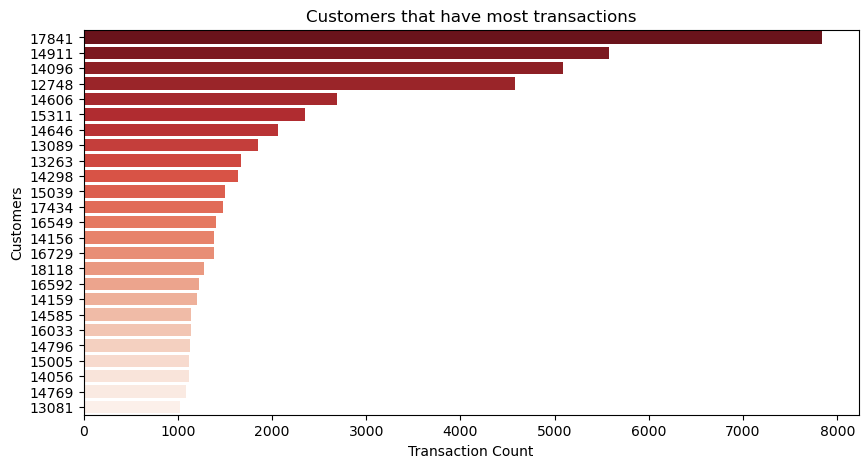

In [15]:
customer_counts_top25 = customer_counts.head(25)

fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data=customer_counts_top25,x = customer_counts_top25["count"],y = customer_counts_top25["CustomerNo"],
            order = customer_counts_top25["CustomerNo"], hue=customer_counts_top25["CustomerNo"], orient = 'h', palette = "Reds_r")

plt.title("Customers that have most transactions")
plt.ylabel("Customers")
plt.xlabel("Transaction Count")

plt.savefig("images/figure_1.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
#Examine Total Sales per Product

product_sales = df.groupby(['ProductName'])['TotalSales'].agg('sum').sort_values(ascending=False).reset_index()
product_sales

,ProductName,TotalSales
0,Paper Craft Little Birdie,1002718.10
1,Medium Ceramic Top Storage Jar,881990.18
2,Popcorn Holder,587433.94
3,World War 2 Gliders Asstd Designs,569735.39
4,Cream Hanging Heart T-Light Holder,484592.69
...,...,...
3748,Dusty Pink Christmas Tree 30cm,11.53
3749,Pink Crystal Guitar Phone Charm,11.12
3750,Hen House W Chick In Nest,10.68
3751,Set 10 Cards Snowy Robin 17099,6.19


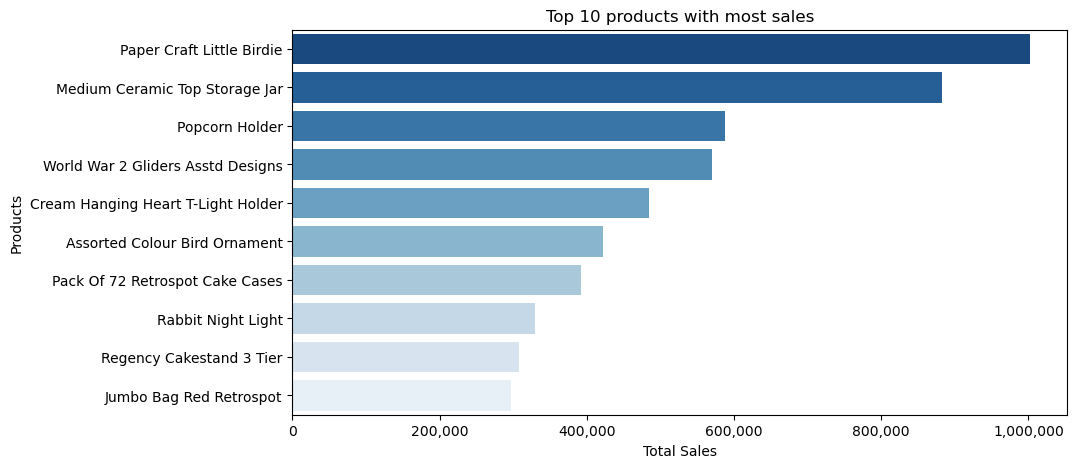

In [17]:
# Examine and Plot top10 Products according to Total Sales


product_sales_top10 = product_sales.head(10)

fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data=product_sales_top10,x = product_sales_top10["TotalSales"],y = product_sales_top10['ProductName'],
            order = product_sales_top10['ProductName'], hue = product_sales_top10['ProductName'] , orient = 'h', palette = "Blues_r")

plt.title("Top 10 products with most sales")
plt.ylabel("Products")
plt.xlabel("Total Sales")
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

plt.savefig("images/figure_2.png", dpi=300, bbox_inches='tight') 
plt.show()

## Market Basket Analysis / Association Rules

In [18]:
#Rank the 5 most ordered products from most to least

df.groupby('ProductName').agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(5).reset_index()

,ProductName,Quantity
0,Paper Craft Little Birdie,80995
1,Medium Ceramic Top Storage Jar,78033
2,Popcorn Holder,56921
3,World War 2 Gliders Asstd Designs,55047
4,Jumbo Bag Red Retrospot,48478


In [19]:
#Rank the 5 products with the most sales

df.groupby("ProductName").agg({"TotalSales":"sum"}).sort_values("TotalSales", ascending=False).head(5).reset_index()

,ProductName,TotalSales
0,Paper Craft Little Birdie,1002718.10
1,Medium Ceramic Top Storage Jar,881990.18
2,Popcorn Holder,587433.94
3,World War 2 Gliders Asstd Designs,569735.39
4,Cream Hanging Heart T-Light Holder,484592.69


In [20]:
# inputs for apriori algorithm
supp = 1 # minimum support of an assoc. rule (default: 10)
conf = 5 # minimum confidence of an assoc. rule (default: 80%)
report = 'aSCl'

In [21]:
report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'support of the empty set (total number of transactions)'
    }

In [22]:
# Create list only with Customers and Products
Customers_Products=df.groupby(['CustomerNo','Date'])['ProductName'].apply(list)


# Create list of lists to pass it into PyFim

Customers_Products_List=Customers_Products.to_list()
Customers_Products_List[0:3]

[['Red Retrospot Cake Stand',
  'Picnic Basket Wicker Large',
  '3 Hook Photo Shelf Antique White',
  'Victorian Sewing Box Medium',
  'Gingerbread Man Cookie Cutter',
  'Multicolour Spring Flower Mug',
  'Tea Time Party Bunting',
  'Set/6 Purple Butterfly T-Lights',
  'Wooden Picture Frame White Finish',
  'Set Of 3 Butterfly Cookie Cutters',
  'Set Of 4 Polkadot Placemats',
  'Set Of 4 Polkadot Coasters',
  '75 Green Petit Four Cases',
  'Charlie+Lola"Extremely Busy" Sign',
  'Red Enchanted Forest Placemat',
  'Red Retrospot Bowl',
  'Strawberry Shopper Bag',
  'Glitter Butterfly Clips',
  'Set/6 Red Spotty Paper Cups',
  'Set/6 Red Spotty Paper Plates',
  'Toxic Area Door Hanger',
  'Strawberry Ceramic Trinket Pot',
  'Set Of Picture Frame Stickers',
  'Set/3 Red Gingham Rose Storage Box',
  'Set Of 6 Funky Beakers',
  'Skull Lunch Box With Cutlery',
  'White Spot Red Ceramic Drawer Knob',
  'Citronella Candle Garden Pot',
  'Red Toadstool Led Night Light',
  'Jumbo Storage Bag Suki

In [23]:
# Run apriori algorithm to creeate associations
result = arules(Customers_Products_List, supp=supp, conf=conf, report=report,zmin=2,zmax=2)


#Creat dataframe with columns based on the report variables and sorted based on the "Associations_Sorted_based_on"
colnames = ['Cons_Product', 'antecedent'] + [report_colnames.get(k, k) for k in list(report)]
df_rules = pd.DataFrame(result, columns=colnames)
df_rules = df_rules.sort_values(report_colnames["a"], ascending=False)

#Change order of columns antecedent and consequent to make more sense
df_rules = df_rules[['antecedent', 'Cons_Product']+ [report_colnames.get(k, k) for k in list(report)]]


#Print the numbers of rules created
print(df_rules.shape)

#Print top 5 rules
df_rules.head(5)

(615025, 6)


,antecedent,Cons_Product,support_itemset_absolute,support_itemset_relative_pct,confidence_pct,lift
1723,"(Jumbo Bag Red Retrospot,)",Jumbo Bag Pink Polkadot,826,4.575163,39.749759,5.921140
1722,"(Jumbo Bag Pink Polkadot,)",Jumbo Bag Red Retrospot,826,4.575163,68.151815,5.921140
294,"(Roses Regency Teacup And Saucer,)",Green Regency Teacup And Saucer,764,4.231749,72.211720,12.908024
295,"(Green Regency Teacup And Saucer,)",Roses Regency Teacup And Saucer,764,4.231749,75.643564,12.908024
182,"(Jumbo Storage Bag Suki,)",Jumbo Bag Red Retrospot,725,4.015731,61.440678,5.338065


#### The df_rules table is sorted according a = support_itemset_absolute so the top five combinations of products show up.

In [24]:
df_rules.sort_values(by=['confidence_pct'], ascending=False).head(5)

,antecedent,Cons_Product,support_itemset_absolute,support_itemset_relative_pct,confidence_pct,lift
383234,"(Herb Marker Thyme,)",Herb Marker Rosemary,221,1.224105,93.644068,70.738494
383235,"(Herb Marker Rosemary,)",Herb Marker Thyme,221,1.224105,92.468619,70.738494
478943,"(Herb Marker Chives,)",Herb Marker Parsley,191,1.057937,92.270531,70.586957
478957,"(Herb Marker Chives,)",Herb Marker Mint,189,1.046859,91.304348,68.971075
177410,"(Regency Tea Plate Pink,)",Regency Tea Plate Green,275,1.523208,91.059603,43.607164


In [25]:
df_rules.sort_values(by=['lift'], ascending=False).head(5)

,antecedent,Cons_Product,support_itemset_absolute,support_itemset_relative_pct,confidence_pct,lift
614758,"(Set 12 Colouring Pencils Doily,)",Set 10 Cards Cheerful Robin 17065,10,0.055389,5.154639,93.061856
611532,"(3 Raffia Ribbons 50'S Christmas,)",Set 10 Cards Dinky Tree 17076,16,0.088623,8.040201,90.723618
613632,"(3 Raffia Ribbons 50'S Christmas,)",Set 10 Card Kraft Reindeer 17084,14,0.077545,7.035176,90.723618
614757,"(3 Raffia Ribbons 50'S Christmas,)",Set 10 Cards Cheerful Robin 17065,10,0.055389,5.025126,90.723618
611533,"(Set 12 Colouring Pencils Doily,)",Set 10 Cards Dinky Tree 17076,15,0.083084,7.731959,87.245490


## Now we have sorted our df based on lift which shows how many times more probable a customer is to buy the consequent product after he/she had already bought the antecedent product in comparison to what statistics expect.

In [26]:
df_rules.sort_values(by=['lift'], ascending=True).head(5)

,antecedent,Cons_Product,support_itemset_absolute,support_itemset_relative_pct,confidence_pct,lift
287805,"(Lunch Bag Paisley Park,)",Party Bunting,19,0.105240,5.882353,0.632519
488082,"(Pens Assorted Funny Face,)",Assorted Colour Bird Ornament,11,0.060928,5.092593,0.633207
544297,"(Home Sweet Home Cushion Cover,)",Party Bunting,14,0.077545,6.140351,0.660261
526075,"(Classic Chrome Bicycle Bell,)",Party Bunting,12,0.066467,6.153846,0.661713
559314,"(Jingle Bell Heart Antique Silver,)",Party Bunting,13,0.072006,6.220096,0.668836


## Cohort Analysis

In [27]:
# Create the cohort and order_month variables

df['order_month'] = df['Date'].dt.to_period('M')

In [28]:
df['cohort']= df.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalSales,order_month,cohort
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64,2019-12,2019-06
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40,2019-12,2018-12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36,2019-12,2018-12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80,2019-12,2018-12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64,2019-12,2018-12
...,...,...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460,United Kingdom,40.90,2018-12,2018-12
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065,United Kingdom,20.45,2018-12,2018-12
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065,United Kingdom,40.90,2018-12,2018-12
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606,United Kingdom,20.45,2018-12,2018-12


In [29]:
#We aggregate the data per cohort and order_month and count the number of unique customers in each group.

df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('CustomerNo',
                                                                   'nunique')).reset_index(drop=False)

In [30]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort


,cohort,order_month,n_customers,period_number
0,2018-12,2018-12,1026,0
1,2018-12,2019-01,341,1
2,2018-12,2019-02,310,2
3,2018-12,2019-03,368,3
4,2018-12,2019-04,355,4
...,...,...,...,...
86,2019-10,2019-11,78,1
87,2019-10,2019-12,34,2
88,2019-11,2019-11,290,0
89,2019-11,2019-12,32,1


In [31]:
# We aggregate the data per cohort and order_month and count the number of unique customers in each group.

cohort_pivot = df_cohort.pivot_table(index='cohort', 
                                     columns='period_number', 
                                     values='n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2018-12,1026.0,341.0,310.0,368.0,355.0,385.0,359.0,346.0,333.0,388.0,369.0,492.0,248.0
2019-01,486.0,98.0,127.0,111.0,147.0,136.0,113.0,114.0,138.0,154.0,166.0,56.0,NaN
2019-02,438.0,83.0,80.0,114.0,115.0,98.0,105.0,117.0,103.0,132.0,30.0,NaN,NaN
2019-03,503.0,71.0,115.0,95.0,116.0,83.0,131.0,117.0,143.0,47.0,NaN,NaN,NaN
2019-04,321.0,66.0,60.0,63.0,62.0,74.0,69.0,83.0,25.0,NaN,NaN,NaN,NaN
2019-05,332.0,62.0,62.0,55.0,68.0,73.0,84.0,28.0,NaN,NaN,NaN,NaN,NaN
2019-06,274.0,48.0,41.0,60.0,62.0,79.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-07,211.0,31.0,37.0,43.0,63.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,173.0,32.0,41.0,39.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [33]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2018-12,1.0,0.332359,0.302144,0.358674,0.346004,0.375244,0.349903,0.337232,0.324561,0.378168,0.359649,0.479532,0.241715
2019-01,1.0,0.201646,0.261317,0.228395,0.302469,0.279835,0.232510,0.234568,0.283951,0.316872,0.341564,0.115226,NaN
2019-02,1.0,0.189498,0.182648,0.260274,0.262557,0.223744,0.239726,0.267123,0.235160,0.301370,0.068493,NaN,NaN
2019-03,1.0,0.141153,0.228628,0.188867,0.230616,0.165010,0.260437,0.232604,0.284294,0.093439,NaN,NaN,NaN
2019-04,1.0,0.205607,0.186916,0.196262,0.193146,0.230530,0.214953,0.258567,0.077882,NaN,NaN,NaN,NaN
2019-05,1.0,0.186747,0.186747,0.165663,0.204819,0.219880,0.253012,0.084337,NaN,NaN,NaN,NaN,NaN
2019-06,1.0,0.175182,0.149635,0.218978,0.226277,0.288321,0.105839,NaN,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.146919,0.175355,0.203791,0.298578,0.104265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.184971,0.236994,0.225434,0.115607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


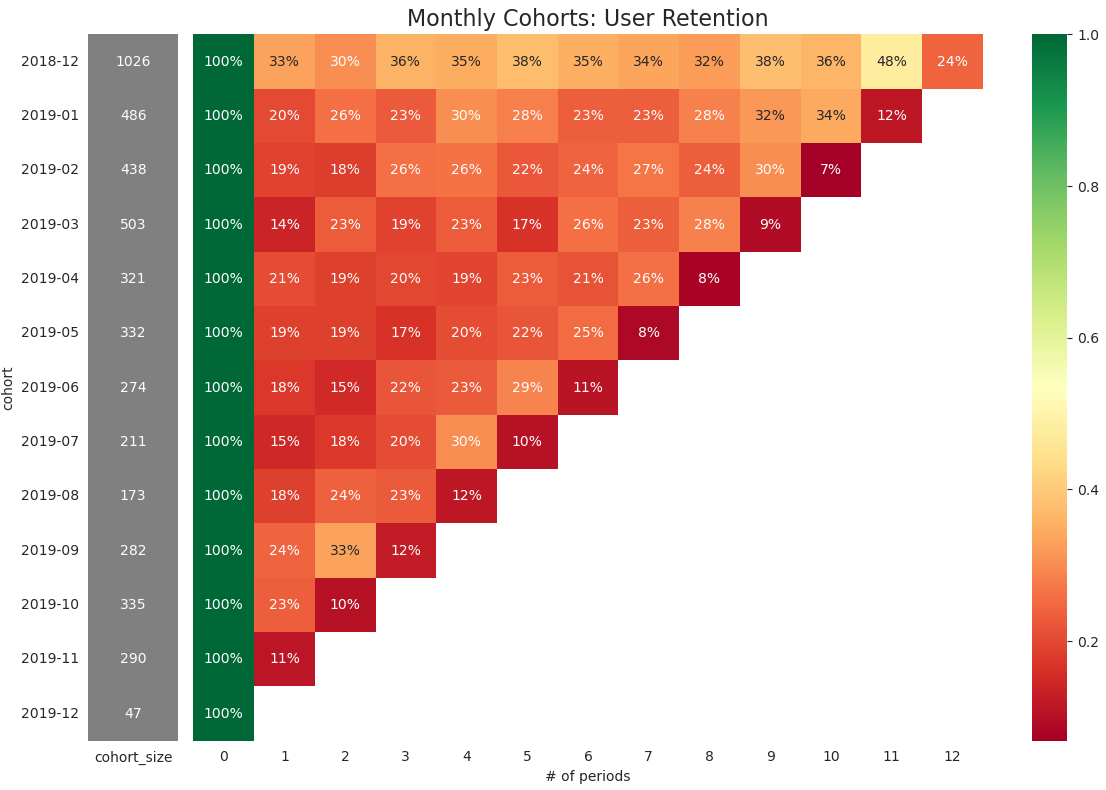

In [34]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['grey'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()
    plt.savefig("images/figure_3.png", dpi=300, bbox_inches='tight')

#### By excluding first and last cohort the top 3 cohorts by sizes are:

#### cohort 2019-03 with size 503 new customers

#### cohort 2019-01 with size 486 new customers

#### cohort 2019-02 with size 438 new customers

#### Also by including all cohorts,

#### the cohort with the highest customer retention is cohort 2018-12, 11 months after the initial buy having 48% customer retention.

#### On the other hand, the cohorts with the lowest customer retention is cohort:

#### 2019-02, 10 months after the initial buy, having only 7% customer retention

